# 첫 번째 합성곱 신경망

## 라이브러리 임포트

In [1]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K 

from keras.datasets import cifar10

Using TensorFlow backend.


## 데이터 적재

In [2]:
NUM_CLASSES = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
x_train[54, 12, 13, 1] 

0.36862746

## 모델 만들기

In [6]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
    )(input_layer)

conv_layer_2 = Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
    )(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [8]:
# unit                      # 원리                                                                                  # Param 수                  # Layer 구분    # 원리
32*32*3 == 3072                                                                                                                                ## input
32/2 * 32/2 * 10 == 2560    # 행/strides x 열/strides x 10(filters) // (filters=10, strides=2, padding='same')     (4*4*3) * 10 + 10 == 490     # conv2d        # [4 x 4(conv layer1 kernel size) x 3(input filter)] x 10(conv layer1 filters) + 10(상수항)
16/2 * 16/2 * 20 == 1280    # 행/strides x 열/strides x 20(filters) // (filters=20, strides=2, padding='same')     (3*3*10) * 20 + 20 == 1820   # conv2d        # [3 x 3(conv layer2 kernel size) x 10(conv layer1 filters)] x 20(conv layer2 filters) + 20(상수항)
8*8*20 == 1280                                                                                                                                 ## flatten
10                          # units=10                                                                             (1280) * 10 + 10 == 12810    # Dense         # [1280(flatten layer cell count)] * 10(dense layer units) + 10(상수항)


10

In [9]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 32)        0         
__________

In [11]:
32*32*3 == 3072             ## input
(3*3*3) * 32 + 32 == 896     # conv2d


(3*3*32) * 32 + 32 == 1820   # conv2d

(3*3*32) * 64 + 64 == 18496  # conv2d

(3*3*64) * 64 + 64 == 36928  # conv2d


8*8*64 == 4096              ## flatten
(4096+1)*128 == 524416      # Dense

(128+1)*10 == 1290          # Dense

True

## 모델 훈련

In [12]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [13]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Instructions for updating:
Use tf.cast instead.


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 152s 3ms/step - loss: 1.5463 - acc: 0.4605 - val_loss: 1.1848 - val_acc: 0.5791
Epoch 2/10
50000/50000 [==============================] - 160s 3ms/step - loss: 1.1293 - acc: 0.6022 - val_loss: 1.0303 - val_acc: 0.6393
Epoch 3/10
50000/50000 [==============================] - 170s 3ms/step - loss: 0.9870 - acc: 0.6577 - val_loss: 0.9655 - val_acc: 0.6627
Epoch 4/10
50000/50000 [==============================] - 161s 3ms/step - loss: 0.9078 - acc: 0.6840 - val_loss: 0.8708 - val_acc: 0.6954
Epoch 5/10
50000/50000 [==============================] - 164s 3ms/step - loss: 0.8429 - acc: 0.7073 - val_loss: 0.8677 - val_acc: 0.6959
Epoch 6/10
50000/50000 [==============================] - 166s 3ms/step - loss: 0.7975 - acc: 0.7226 - val_loss: 0.8830 - val_acc: 0.6893
Epoch 7/10
50000/50000 [==============================] - 172s 3ms/step - loss: 0.7555 - acc: 0.7360 - val_loss: 0.8259 - 

In [14]:
model.layers

In [15]:
model.layers[5].get_weights()

[array([0.89581114, 1.0009497 , 1.1307687 , 0.95524883, 0.9336335 ,
        0.96345735, 0.93462443, 0.76273656, 0.9990611 , 0.83972645,
        0.94612235, 0.85969996, 0.89922833, 0.79688454, 1.0673803 ,
        1.2619643 , 1.0609255 , 1.0766088 , 0.83162904, 0.94234157,
        1.253134  , 0.86711854, 0.92127585, 0.97002065, 1.1610252 ,
        1.1503918 , 0.7723104 , 0.89935094, 1.0464828 , 0.87911546,
        1.0163659 , 1.1798846 ], dtype=float32),
 array([-0.08881325, -0.10392905, -0.02275274, -0.12269443,  0.11324387,
        -0.08731604, -0.08577338, -0.26404336, -0.2268302 , -0.19370908,
        -0.06842361, -0.15728138, -0.20219114, -0.17025506,  0.00724269,
        -0.16367754, -0.11532439, -0.11753442, -0.23855625, -0.20802678,
        -0.17142037, -0.18595909, -0.2446163 , -0.08409601, -0.15442857,
        -0.16021213, -0.0833473 , -0.07942065, -0.13949278, -0.1863068 ,
        -0.2516877 , -0.04911911], dtype=float32),
 array([-1.3364408 , -0.01109197, -0.29986787,  0.0381

## 모델 평가

In [16]:
model.evaluate(x_test, y_test, batch_size=1000)

10000/10000 [==============================] - 8s 821us/step


[0.8114925563335419, 0.7194000005722045]

In [17]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

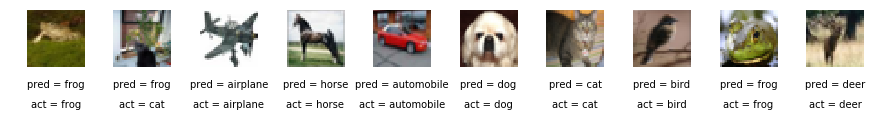

In [19]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)